# LRES

## Questionnaire: Qualitative

In [1]:
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
import pyreadstat
from tabulate import tabulate

######################################################################################### 

##SETUP##
sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)


#### DEMOGRAPHICS

In [2]:
D1 = {'Age': ['18 – 35','35 - 45', '45 - 55', '55 - 65', '65 - 75', '+75', 'Total'],
      'Female': [2, 4, 9, 8, 9, 4, 36],
      'Male': [5, 4, 3, 5, 3, 2, 22],
     'Total': [7, 8, 12, 13, 12, 6, 58]}

D1_2 = {'Age': ['18 – 35','35 - 45', '45 - 55', '55 - 65', '65 - 75', '+75','18 – 35','35 - 45', '45 - 55', '55 - 65', '65 - 75', '+75'],
      'value': [2, 4, 9, 8, 9, 4, 5, 4, 3, 5, 3, 2],
      'Gender': ['Female', 'Female','Female','Female','Female','Female', 'Male','Male','Male','Male','Male','Male']}

df_d1 = pd.DataFrame(D1, columns=['Age','Female','Male', 'Total'])

df_d1.set_index('Age', drop=True, inplace=True)

#print(tabulate(df_d1, headers=['Age', 'Female','Male', '\033[1m' +'Total'+ '\033[0m'], tablefmt='fancy_grid' ))

In [3]:
df_d1_1=df_d1.drop('Total')
df_d1_1 = df_d1_1.reset_index(drop=False)

In [4]:
df_gen_long = pd.melt(df_d1_1, id_vars=['Age'], value_vars=['Female','Male'])

#df_gen=df_ind_d_1[['bl_id_best_gen']]
#df_gen_long_g = df_gen_long.groupby(['variable']).value_counts().rename('count').reset_index()

df_gen_long_g = df_gen_long[['variable','value']].groupby(['variable']).sum().reset_index()

#print(sum(df_gen_long_g['value']))
df_gen_long_g['pct'] = df_gen_long_g['value']/sum(df_gen_long_g['value'])*100
df_gen_long_g

,variable,value,pct
0,Female,36,62.068966
1,Male,22,37.931034


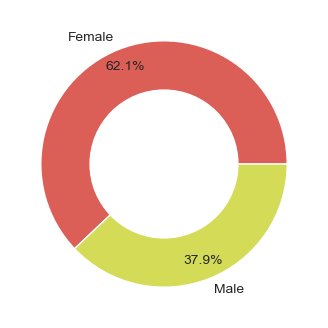

In [5]:
#
colors =sns.color_palette("hls")[0:4]
labels = df_gen_long_g['variable'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_gen_long_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ql_gender.svg")
plt.show()

plt.close()

In [6]:
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + 'Table 2: Demographic characteristics of study participants' + "\n")
df_gen_long1 = pd.melt(df_d1_1, id_vars=['Age'], value_vars=['Female','Male'])
df_gen_long1

df_gen_long_g1 = df_gen_long1[['Age','value']].groupby(['Age']).sum().reset_index()

#print(sum(df_gen_long_g['value']))
df_gen_long_g1['pct'] = df_gen_long_g1['value']/sum(df_gen_long_g1['value'])*100
df_gen_long_g1

--------
Outcome (derived): Table 2: Demographic characteristics of study participants



,Age,value,pct
0,+75,6,10.344828
1,18 – 35,7,12.068966
2,35 - 45,8,13.793103
3,45 - 55,12,20.689655
4,55 - 65,13,22.413793
5,65 - 75,12,20.689655


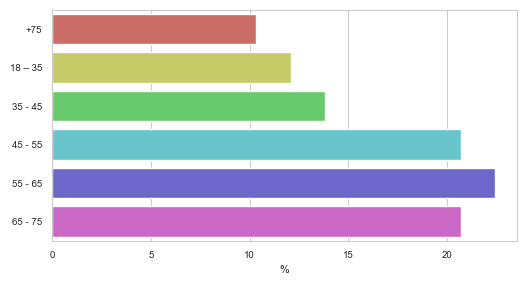

In [7]:
###### df_age2 = df_age2.set_index("bl_id_best_age_intervals", drop=False)
#df_age2 = df_age2.drop("Don't know")

sns.set_palette("hls",6)
#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,3]
sns.set_style("whitegrid")
ax=sns.barplot(data=df_gen_long_g1, y="Age", x='pct')
plt.title('', fontsize=12)
plt.xlabel('%',fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend( loc='upper right', title='', fontsize=8)
#plt.gca().add_artist(col_lgd)
plt.savefig("ql_demographics_3.svg")
plt.show()

plt.close()

In [8]:
D2 = {'Status': ['ODI','ODI child', 'ODI granchild', 'ODI great granchild'],
      'Number': [13, 22, 12, 11]}

df_d2 = pd.DataFrame(D2, columns=['Status','Number'])

#df_d2.set_index('Status', drop=True, inplace=True)

#print(tabulate(df_d2, headers=['Status','Number'], tablefmt='fancy_grid' ))
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + 'Table 3: Status of participants in relation to the claim' + "\n")


df_d2['pct'] = df_d2['Number']/sum(df_d2['Number'])*100
df_d2


--------
Outcome (derived): Table 3: Status of participants in relation to the claim



,Status,Number,pct
0,ODI,13,22.413793
1,ODI child,22,37.931034
2,ODI granchild,12,20.689655
3,ODI great granchild,11,18.965517


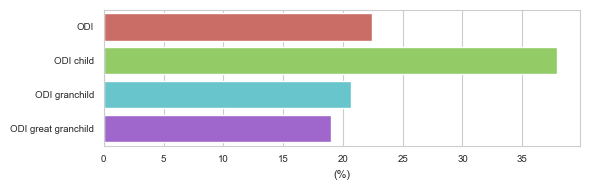

In [9]:
plt.rcParams["figure.figsize"]=[6,2]
sns.set_palette("hls",4)
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
#ax= df_unemp_g.pivot(index='bl_i_unemex', columns='count',values='pct').plot(kind='barh', stacked=True, rot=90)
ax = sns.barplot(data=df_d2, y='Status', x='pct')
#plt.xlim(0,1)
#ax = df_unemp_g.plot.barh(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
#plt.title('Number of Surveyed Individuals', fontsize=12)
plt.xlabel('(%)', fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("ql_status_1.svg")
plt.show()

In [10]:
D3 = {'Source': ['Retirement pension','Old age grant', 'Child grant', 'Self-employed','Employed full-time','Employed part-time', 'Gov grant and one other source', 'Gov grant and two other sources','Other source','More than one other source'],
      'ODI': [ 2, 8, 0, 0, 0, 1, 2, 0, 0, 0],
     'Child': [ 0, 10, 0, 1, 4, 2, 2, 1, 1, 1],
     'Grandchild': [ 0, 0, 1, 2, 2, 3, 0, 0, 0, 2],
     'Great grandchild': [ 0, 0, 2, 0 , 1, 0, 0, 0, 3, 0]}

df_d3 = pd.DataFrame(D3, columns=['Source','ODI','Child', 'Grandchild', 'Great grandchild'])

df_d3.set_index('Source', drop=True, inplace=True)

#print(tabulate(df_d2, headers=['Status','Number'], tablefmt='fancy_grid' ))
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + 'Table 4: Main sources of beneficiary income' + "\n")

df_d3_1 = df_d3.T
df_d3_1

--------
Outcome (derived): Table 4: Main sources of beneficiary income



Source,Retirement pension,Old age grant,Child grant,Self-employed,Employed full-time,Employed part-time,Gov grant and one other source,Gov grant and two other sources,Other source,More than one other source
ODI,2,8,0,0,0,1,2,0,0,0
Child,0,10,0,1,4,2,2,1,1,1
Grandchild,0,0,1,2,2,3,0,0,0,2
Great grandchild,0,0,2,0,1,0,0,0,3,0


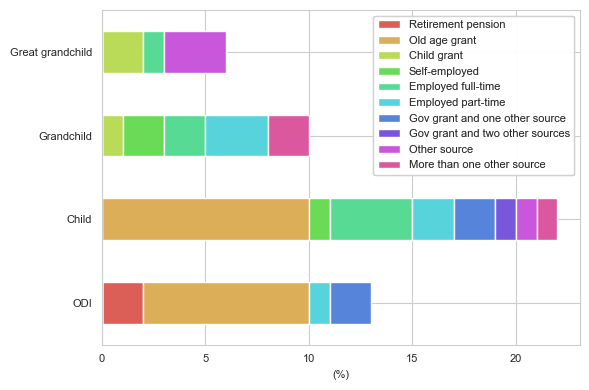

In [14]:
#

sns.set_palette("hls",10)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,4]
sns.set_style("whitegrid")
ax = df_d3_1.plot.barh(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
#plt.title('Access', fontsize=12)
plt.ylabel('')
plt.xlabel('(%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper right', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_d3_1.columns)
tableColLength = len(df_d3_1.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_d3_1.iloc[cIx].sum())
'''
plt.savefig("ql_inc_1.svg")
plt.show()

plt.close()


In [12]:
ws = pd.ExcelWriter('es_ql_2.xlsx', engine='xlsxwriter')
df_gen_long_g.to_excel(ws, sheet_name='fig 1.2')
df_gen_long_g1.to_excel(ws, sheet_name='fig 1.3')
df_d3_1.to_excel(ws, sheet_name='fig 1.4')
ws.save()

In [13]:
!jupyter-nbconvert --no-input --no-prompt --to html es_qual_1.ipynb

[NbConvertApp] Converting notebook es_qual_1.ipynb to html
[NbConvertApp] Writing 274209 bytes to es_qual_1.html
